# New York City Crime Acitivites Depending on Moon/Sun Activities

New York is a city that experiences criminal activities. Analyzing crime data can provide insights for patterns that can help in formulating the crime occurences.

# 1. Data Collection

1. New York Crime Data
For New York crime data, I have searched through official website of New York City:


> https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc/about_data



The dataset consists of crimes commited year to date, from 01/01/2024 to today, I have selected three months period, between 01/01/2024 - 31/03/2024.

2. Daily Moon Phases
The calculation of 9 different phases were done by code.

3. Sunrise and Sunset Calculation
Sunrise and sunset calculation is done using Astral library, entering parameters city and dates required.


> https://astral.readthedocs.io/en/latest/


4. Sunspot Numbers Data
I have used the dataset for daily estimated sunspot number on https://www.sidc.be/SILSO/datafiles#total

I am processing the datas that I have collected step by step. Firstly, the New York arrest data is imported and cleaned.


## 1.1. Crime Data of New York City
Using **Pandas** module, the CSV file was read. First I have printed the data types of the columns. The dataset size is 63621x19 (rows and columns) with different data types as int64, object, float64. If same person did not commit crime in the 3 months period, that means 63621 unique person is in the list.

The columns consist of important data such as *Arrest Date*, *Police Dep. Description*, *Offense Description*, *Age Group*, *Perp Sex*, *Perp Race*, *Latitude*, and *Longitude*.  

In [ ]:
#Import crime data and clean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/2024-2025 Summer (Uniwersytet Slaski)/Data Mining/Assignments/Final Project/NYPD_Arrest_Data__Year_to_Date_.csv'

# Read the CSV file with pandas dataframe
df = pd.read_csv(file_path)

# Show data types of columns
print("Data:")
print(df.dtypes)

# Row and column numbers
count_row = df.shape[0]
count_col = df.shape[1]
print('\nRow x Columns Size :')
print(count_row, 'x', count_col)

numerical_columns = ['Latitude', 'Longitude', 'PD_CD', 'KY_CD']

# Calculate summary statistics
summary = df[numerical_columns].describe()

Data:
ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

Row x Columns Size :
63621 x 19


## 1.2. Data Cleaning of New York Crime Data
### 1.2.1. Checking Outliers
In this step, the outliers inside New York crime dataset were detected, numbers and plots were observed. Considering numerical values, there are 4 different columns to evaluate outliers. The highest number is for longitudes which is normal, not all crimes were commited in the same place. However having the smaller number of longitudes than the person number that commited crime means some of the locations might be conflicting. For example longitude "-73.881509" has a count of 464.


Number of outliers :
Latitude        2
Longitude    1274
PD_CD           0
KY_CD        1120
dtype: int64


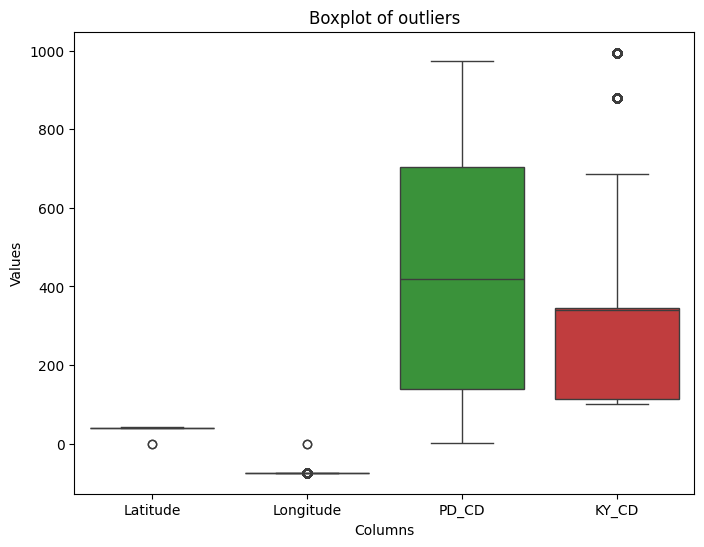

Outlier values :
Latitude :
53       40.854588
61       40.623238
74       40.824075
167      40.631337
208      40.743766
           ...    
63501    40.631930
63536    40.548486
63542    40.745396
63580    40.531427
63620    40.531707
Name: Latitude, Length: 2371, dtype: float64

Longitude :
53      -73.901861
61      -74.149217
74      -73.859783
167     -74.147788
208     -74.007023
           ...    
63501   -74.163466
63536   -74.220607
63542   -73.718234
63580   -74.217781
63620   -74.192126
Name: Longitude, Length: 2371, dtype: float64

PD_CD :
53       969.0
61       759.0
74       969.0
167      922.0
208       49.0
         ...  
63501    109.0
63536    922.0
63542    439.0
63580    847.0
63620    203.0
Name: PD_CD, Length: 2371, dtype: float64

KY_CD :
53       881.0
61       359.0
74       881.0
167      348.0
208      995.0
         ...  
63501    106.0
63536    348.0
63542    109.0
63580    125.0
63620    352.0
Name: KY_CD, Length: 2371, dtype: float64

Count of each lon

In [ ]:
# Identifying outliers for numerical columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

# Printing number of outliers per column
print("Number of outliers :")
print(outliers.sum())

# Box plots for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# Print outlier values
print("Outlier values :")
for column in numerical_columns:
    column_outliers = df.loc[outliers.any(axis=1), column]
    print(f"{column} :")
    print(column_outliers)
    print()

longitude_counts = df['Longitude'].value_counts()

# Print the counts
print("Count of each longitude value:")
print(longitude_counts)

### 1.2.2. Checking Duplicates
The duplicates inside the dataset were checked and no duplicates were found.


In [ ]:
# Duplicate check for each row
duplicate_rows = df[df.duplicated()]

# Print duplicate rows
if not duplicate_rows.empty:
    print("Duplicate rows :")
    print(duplicate_rows)
else:
    print("There are no duplicate rows")

# Dropping duplicates
df_cleaned = df.drop_duplicates()

There are no duplicate rows


### 1.2.3. Drop Columns With No Useful Information
After observing the columns of data, it can be decided that some columns does not include useful information for our research. A list **selected_columns** keeps the columns I would like to store.





### 1.2.4. Drop NA and Null Rows
Using related functions ```dropna()``` and ```isnull()```, the Na and empty rows were dropped.


In [ ]:
# Eliminating the columns information that would not help
selected_columns = ['ARREST_DATE', 'OFNS_DESC', 'Latitude', 'Longitude', 'PD_CD']
df_selected = df[selected_columns]

# Converting Arrest date to datetime
df_selected['ARREST_DATE'] = pd.to_datetime(df_selected['ARREST_DATE'])

# Clean missing data from dataset
df_cleaned = df_selected.dropna()

print("Null values in each column before cleaning :")
print(df_cleaned.isnull().sum())

# Show head of the cleaned data
print(df_cleaned.head())

#df_cleaned.to_csv('updated_crime_data.csv', index=False)

Null values in each column before cleaning :
ARREST_DATE    0
OFNS_DESC      0
Latitude       0
Longitude      0
PD_CD          0
dtype: int64
  ARREST_DATE                     OFNS_DESC   Latitude  Longitude  PD_CD
0  2024-01-10                       ROBBERY  40.814845 -73.956312  397.0
1  2024-01-02                          RAPE  40.674496 -73.930571  157.0
2  2024-01-03  ASSAULT 3 & RELATED OFFENSES  40.662526 -73.846499  101.0
3  2024-01-19               DANGEROUS DRUGS  40.855793 -73.843908  511.0
4  2024-01-11                FELONY ASSAULT  40.694456 -73.934343  109.0


<ipython-input-4-c03e9defdb71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['ARREST_DATE'] = pd.to_datetime(df_selected['ARREST_DATE'])


## 1.2. Moon Phase Calculation
The moon phases according to dates were calculated and transferred into dataframe.

In [ ]:
# Moon Phase Calculation
# Import math, datetime
import math
from datetime import datetime, timedelta
import pandas as pd

# Create a class for moon phase
class MoonPhase:
    def __init__(self, date):
        self.date = date

    def phase_of_moon(self):
        year = self.date.year
        month = self.date.month
        day = self.date.day

        # Inserting conditions for the interval of crime dataset
        # From 01/01/2024 to 31/03/2024
        if month < 3:
            year -= 1
            month += 12

        a = math.floor(year / 100)
        b = 2 - a + math.floor(a / 4)
        jd = math.floor(365.25 * (year + 4716)) + math.floor(30.6001 * (month + 1)) + day + b - 1524.5

        days_since_new = jd - 2451550.1
        new_moons = days_since_new / 29.53058867
        phase = new_moons - math.floor(new_moons)
        age = phase * 29.53

        if age < 1.84566:
            return "New Moon"
        elif age < 5.53699:
            return "Waxing Crescent"
        elif age < 9.22831:
            return "First Quarter"
        elif age < 12.91963:
            return "Waxing Gibbous"
        elif age < 16.61096:
            return "Full Moon"
        elif age < 20.30228:
            return "Waning Gibbous"
        elif age < 23.99361:
            return "Last Quarter"
        elif age < 27.68493:
            return "Waning Crescent"
        else:
            return "New Moon"

# Calculate moon phases between 01/01/2024 and 31/03/2024
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 3, 31)
date_range = pd.date_range(start=start_date, end=end_date)

moon_phases = []
# Appending the dates in format of crime dataset
for date in date_range:
    moon_phase = MoonPhase(date)
    phase = moon_phase.phase_of_moon()
    moon_phases.append({'ARREST_DATE': date.strftime('%Y-%m-%d'), 'Moon_Phase': phase})

# Create dataframe from the list of moon phases
df_moon_phases = pd.DataFrame(moon_phases)

# Convert ARREST_DATE to datetime for correct merging
df_moon_phases['ARREST_DATE'] = pd.to_datetime(df_moon_phases['ARREST_DATE'], format='%Y-%m-%d')

# Show the moon phases
print(df_moon_phases)

   ARREST_DATE      Moon_Phase
0   2024-01-01  Waning Gibbous
1   2024-01-02    Last Quarter
2   2024-01-03    Last Quarter
3   2024-01-04    Last Quarter
4   2024-01-05    Last Quarter
..         ...             ...
86  2024-03-27  Waning Gibbous
87  2024-03-28  Waning Gibbous
88  2024-03-29  Waning Gibbous
89  2024-03-30  Waning Gibbous
90  2024-03-31    Last Quarter

[91 rows x 2 columns]


### 1.2.1. Data Integration

In [ ]:
# ARREST_DATE to datetime format
df_cleaned['ARREST_DATE'] = pd.to_datetime(df_cleaned['ARREST_DATE'], format='%Y-%m-%d')

# Merge the crime dataset with the moon phases dataset
NY_Crime_w_Moon = pd.merge(df_cleaned, df_moon_phases, on='ARREST_DATE', how='left')

# Show the merged dataset
print(NY_Crime_w_Moon)

      ARREST_DATE                     OFNS_DESC   Latitude  Longitude  PD_CD  \
0      2024-01-10                       ROBBERY  40.814845 -73.956312  397.0   
1      2024-01-02                          RAPE  40.674496 -73.930571  157.0   
2      2024-01-03  ASSAULT 3 & RELATED OFFENSES  40.662526 -73.846499  101.0   
3      2024-01-19               DANGEROUS DRUGS  40.855793 -73.843908  511.0   
4      2024-01-11                FELONY ASSAULT  40.694456 -73.934343  109.0   
...           ...                           ...        ...        ...    ...   
63614  2024-02-27                 PETIT LARCENY  40.576100 -73.989545  339.0   
63615  2024-03-12               DANGEROUS DRUGS  40.740151 -73.994805  511.0   
63616  2024-03-07                       ROBBERY  40.671104 -73.913562  397.0   
63617  2024-03-01      VEHICLE AND TRAFFIC LAWS  40.698894 -73.917522  922.0   
63618  2024-03-10             CRIMINAL TRESPASS  40.531707 -74.192126  203.0   

            Moon_Phase  
0             

<ipython-input-6-678656489304>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ARREST_DATE'] = pd.to_datetime(df_cleaned['ARREST_DATE'], format='%Y-%m-%d')


## 1.3. Sun Activities - Sunrise and Sunset Calculation
Sunrise and sunset values for days were calculated using astral library. After importing it, the location information were entered as New York/USA, between the period that is matching the New York crime dataset (01/01/2024 - 31/03/2024) the calculations were done and recorded to dataframe.

In [ ]:
# Install astral and requests
!pip install astral
!pip install requests

# Import astral and datetime
from astral import LocationInfo
from astral.sun import sun
import datetime
import pandas as pd

# Define the location
city = LocationInfo("New York", "USA")

# Initialize lists to store dates, sunrises, and sunsets
dates = []
sunrises = []
sunsets = []

# Loop through the date range
start_date = datetime.date(2024, 1, 1)
end_date = datetime.date(2024, 3, 31)
delta = datetime.timedelta(days=1)

current_date = start_date
while current_date <= end_date:
    s = sun(city.observer, date=current_date)
    dates.append(current_date.strftime('%Y-%m-%d'))
    sunrises.append(s['sunrise'].strftime('%H:%M'))
    sunsets.append(s['sunset'].strftime('%H:%M'))
    current_date += delta

# Keep sunset/sunrise calculations in dataframe
df_sunset_sunrise = pd.DataFrame({'ARREST_DATE': dates, 'Sunrise': sunrises, 'Sunset': sunsets})

# Show sunset/sunrise dataframe
print(df_sunset_sunrise)

   ARREST_DATE Sunrise Sunset
0   2024-01-01   08:05  16:00
1   2024-01-02   08:05  16:02
2   2024-01-03   08:05  16:03
3   2024-01-04   08:05  16:04
4   2024-01-05   08:05  16:05
..         ...     ...    ...
86  2024-03-27   05:46  18:25
87  2024-03-28   05:43  18:26
88  2024-03-29   05:41  18:28
89  2024-03-30   05:39  18:30
90  2024-03-31   05:37  18:32

[91 rows x 3 columns]


### 1.3.1. Data Cleaning
The Na values inside rows for date, has been changed with a placeholder date such as 1900-01-01, which makes it easier for further steps and analysis.

In [ ]:
NY_Crime_w_Moon['ARREST_DATE'] = pd.to_datetime(NY_Crime_w_Moon['ARREST_DATE'], format='%Y-%m-%d')

# ARREST_DATE to datetime format
df_sunset_sunrise['ARREST_DATE'] = pd.to_datetime(df_sunset_sunrise['ARREST_DATE'], format='%Y-%m-%d')

# Replace Na values in ARREST_DATE with placeholder
NY_Crime_w_Moon['ARREST_DATE'].fillna(pd.to_datetime('1900-01-01'), inplace=True)
df_sunset_sunrise['ARREST_DATE'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

### 1.3.2. Data Integration
Calculated sunrise and sunset values merged to crime dataset with moon phases.

In [ ]:
# Merge the sunrise and sunset data with crime dataset
NY_Crime_w_Moon_SunSR = pd.merge(NY_Crime_w_Moon, df_sunset_sunrise, on='ARREST_DATE', how='left')

# Show the merged dataframe of crime-sunrise-sunset
print(NY_Crime_w_Moon_SunSR)

      ARREST_DATE                     OFNS_DESC   Latitude  Longitude  PD_CD  \
0      2024-01-10                       ROBBERY  40.814845 -73.956312  397.0   
1      2024-01-02                          RAPE  40.674496 -73.930571  157.0   
2      2024-01-03  ASSAULT 3 & RELATED OFFENSES  40.662526 -73.846499  101.0   
3      2024-01-19               DANGEROUS DRUGS  40.855793 -73.843908  511.0   
4      2024-01-11                FELONY ASSAULT  40.694456 -73.934343  109.0   
...           ...                           ...        ...        ...    ...   
63614  2024-02-27                 PETIT LARCENY  40.576100 -73.989545  339.0   
63615  2024-03-12               DANGEROUS DRUGS  40.740151 -73.994805  511.0   
63616  2024-03-07                       ROBBERY  40.671104 -73.913562  397.0   
63617  2024-03-01      VEHICLE AND TRAFFIC LAWS  40.698894 -73.917522  922.0   
63618  2024-03-10             CRIMINAL TRESPASS  40.531707 -74.192126  203.0   

            Moon_Phase Sunrise Sunset  

## 1.4. Sunspot Numbers

### 1.4.1. Data Cleaning
The dataset includes -1 values showing there are missing data on rows. Finding these rows and changing them with the average value of all sunspot values.

In [ ]:
sunspot_data = '/content/drive/MyDrive/Colab Notebooks/daily_sunspot_number.csv'

# Read the CSV
dfSunspot = pd.read_csv(sunspot_data)

# Keep only 'Date' and 'Sunspot Number' columns
dfSunspot = dfSunspot[['Date', 'SunspotNumber']]

# Calculate the average of 'SunspotNumber' excluding -1 values
average_sunspot = dfSunspot.loc[dfSunspot['SunspotNumber'] != -1, 'SunspotNumber'].mean()

# Replace -1 values with the calculated average
dfSunspot.loc[dfSunspot['SunspotNumber'] == -1, 'SunspotNumber'] = average_sunspot

print(dfSunspot.head)

<bound method NDFrame.head of           Date  SunspotNumber
0   2024-01-01           54.0
1   2024-01-02           66.0
2   2024-01-03           57.0
3   2024-01-04           98.0
4   2024-01-05          117.0
..         ...            ...
86  2024-03-27          114.0
87  2024-03-28           98.0
88  2024-03-29           81.0
89  2024-03-30           50.0
90  2024-03-31           66.0

[91 rows x 2 columns]>


### 1.4.2. Data Integration
The daily sunspot dataset is matched with the crime dataset that has been merged with previous features.  

In [ ]:
# Rename 'Date' column to 'ARREST_DATE' in sunspot_data
dfSunspot.rename(columns={'Date': 'ARREST_DATE'}, inplace=True)

dfSunspot['ARREST_DATE'] = pd.to_datetime(df_sunset_sunrise['ARREST_DATE'], format='%Y-%m-%d')

NY_Crime_w_Moon_SunSR['ARREST_DATE'] = pd.to_datetime(NY_Crime_w_Moon_SunSR['ARREST_DATE'], format='%Y-%m-%d')

print(NY_Crime_w_Moon_SunSR['ARREST_DATE'].dtype)
print(dfSunspot['ARREST_DATE'].dtype)

# Merge the sunrise and sunset data with the crime dataset
NY_Crime_w_Moon_SunSR = pd.merge(NY_Crime_w_Moon_SunSR, dfSunspot, on='ARREST_DATE', how='left')

# Show the merged dataframe for crime-sunrise-sunset-sunspot
print(NY_Crime_w_Moon_SunSR)

datetime64[ns]
datetime64[ns]
      ARREST_DATE                     OFNS_DESC   Latitude  Longitude  PD_CD  \
0      2024-01-10                       ROBBERY  40.814845 -73.956312  397.0   
1      2024-01-02                          RAPE  40.674496 -73.930571  157.0   
2      2024-01-03  ASSAULT 3 & RELATED OFFENSES  40.662526 -73.846499  101.0   
3      2024-01-19               DANGEROUS DRUGS  40.855793 -73.843908  511.0   
4      2024-01-11                FELONY ASSAULT  40.694456 -73.934343  109.0   
...           ...                           ...        ...        ...    ...   
63614  2024-02-27                 PETIT LARCENY  40.576100 -73.989545  339.0   
63615  2024-03-12               DANGEROUS DRUGS  40.740151 -73.994805  511.0   
63616  2024-03-07                       ROBBERY  40.671104 -73.913562  397.0   
63617  2024-03-01      VEHICLE AND TRAFFIC LAWS  40.698894 -73.917522  922.0   
63618  2024-03-10             CRIMINAL TRESPASS  40.531707 -74.192126  203.0   

         

Finding the most common moon phases in dataset and dropping the least commons.

In [ ]:
# Count occurrences of each moon phase
moon_phase_counts = NY_Crime_w_Moon_SunSR['Moon_Phase'].value_counts()

# Find moon phases with occurrences below the threshold
moon_phases_to_drop = moon_phase_counts[moon_phase_counts < 2500].index.tolist()

# Filter the dataset to exclude rows with moon phases
filtered_data = NY_Crime_w_Moon_SunSR[~NY_Crime_w_Moon_SunSR['Moon_Phase'].isin(moon_phases_to_drop)]

# Print the number of remaining rows for each moon phase
print(filtered_data['Moon_Phase'].value_counts())

Moon_Phase
Waning Gibbous     8871
New Moon           8689
Waxing Gibbous     8668
Waning Crescent    8296
Last Quarter       7899
First Quarter      7381
Waxing Crescent    7345
Full Moon          6470
Name: count, dtype: int64


Find the most common types of crime and drop others from dataset.

In [ ]:
# Count the occurrences of each crime type
crime_counts = NY_Crime_w_Moon_SunSR['OFNS_DESC'].value_counts()

most_common_crimes = crime_counts.sort_values(ascending=False)

# Identify crime types with counts less than 2500
crime_types_to_drop = crime_counts[crime_counts < 2500].index

# Filter the dataset to keep only crime types not in crime_types_to_drop
filtered_data = NY_Crime_w_Moon_SunSR[~NY_Crime_w_Moon_SunSR['OFNS_DESC'].isin(crime_types_to_drop)]

# Print the number of unique crime types
print(filtered_data['OFNS_DESC'].value_counts())

# Save the last version of dataset to CSV
filtered_data.to_csv('NewYorkCrimeData_MergedwSunMoon.csv', index=False)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      8960
PETIT LARCENY                     6526
FELONY ASSAULT                    5288
DANGEROUS DRUGS                   4733
MISCELLANEOUS PENAL LAW           3992
VEHICLE AND TRAFFIC LAWS          3923
GRAND LARCENY                     3068
ROBBERY                           2945
CRIMINAL MISCHIEF & RELATED OF    2817
DANGEROUS WEAPONS                 2509
Name: count, dtype: int64


# 2. Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert ARREST_DATE to datetime
filtered_data['ARREST_DATE'] = pd.to_datetime(filtered_data['ARREST_DATE'])

# Encode Moon_Phase
filtered_data['Moon_Phase'] = pd.Categorical(filtered_data['Moon_Phase'], categories=['New Moon', 'Waxing Crescent', 'First Quarter',
                                                                    'Waxing Gibbous', 'Full Moon', 'Waning Gibbous',
                                                                    'Last Quarter', 'Waning Crescent'], ordered=True)
filtered_data['Moon_Phase'] = filtered_data['Moon_Phase'].cat.codes

# Convert 'Sunrise' and 'Sunset' to numerical values (minutes since midnight)
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

filtered_data['Sunrise'] = filtered_data['Sunrise'].apply(time_to_minutes)
filtered_data['Sunset'] = filtered_data['Sunset'].apply(time_to_minutes)

# Prepare data for plotting
crime_counts = filtered_data.groupby(['SunspotNumber', 'Sunrise', 'Sunset', 'Moon_Phase'])['OFNS_DESC'].count().reset_index()
crime_counts.rename(columns={'OFNS_DESC': 'Crime_Count'}, inplace=True)

<ipython-input-14-9abda0ea4e5b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ARREST_DATE'] = pd.to_datetime(filtered_data['ARREST_DATE'])
<ipython-input-14-9abda0ea4e5b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Moon_Phase'] = pd.Categorical(filtered_data['Moon_Phase'], categories=['New Moon', 'Waxing Crescent', 'First Quarter',
<ipython-input-14-9abda0ea4e5b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

## 2.1. Relation Between Crime Counts and Sunspot Number (Line Plot)
The graph shows a line graph correlating crime counts with sunspot numbers. The graph shows variability but no clear pattern, showing that higher or lower number of sunspots does not affect the relation between the crime occurence and sunspot.

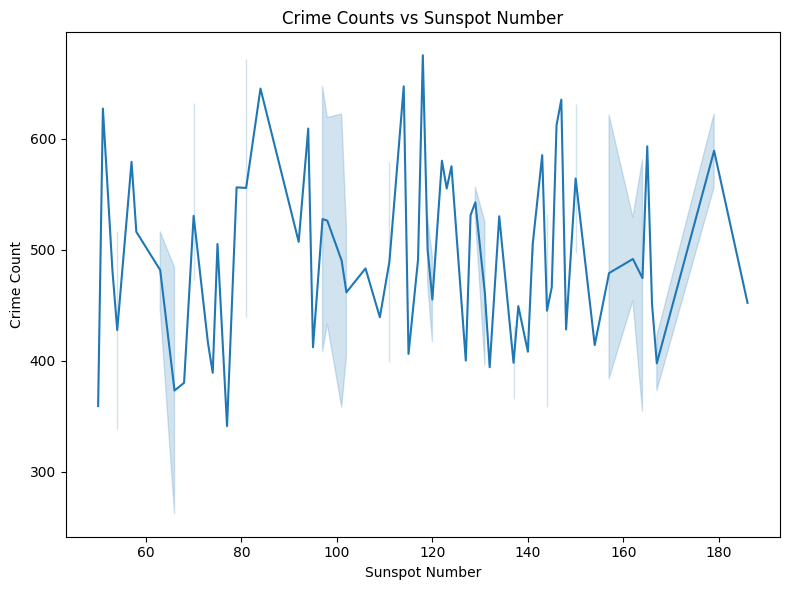

In [ ]:
# Line plot of crime counts against SunspotNumber
plt.figure(figsize=(8, 6))
sns.lineplot(x='SunspotNumber', y='Crime_Count', data=crime_counts)
plt.title('Crime Counts vs Sunspot Number')
plt.xlabel('Sunspot Number')
plt.ylabel('Crime Count')
plt.tight_layout()
plt.show()

## 2.2. Relation Between Crime Counts and Moon Phases (Box Plot)
The box plot confirms median crime count and ranges are similar for all moon phases. This shows that moon phase is not a strong feature to predict the crime occurence.

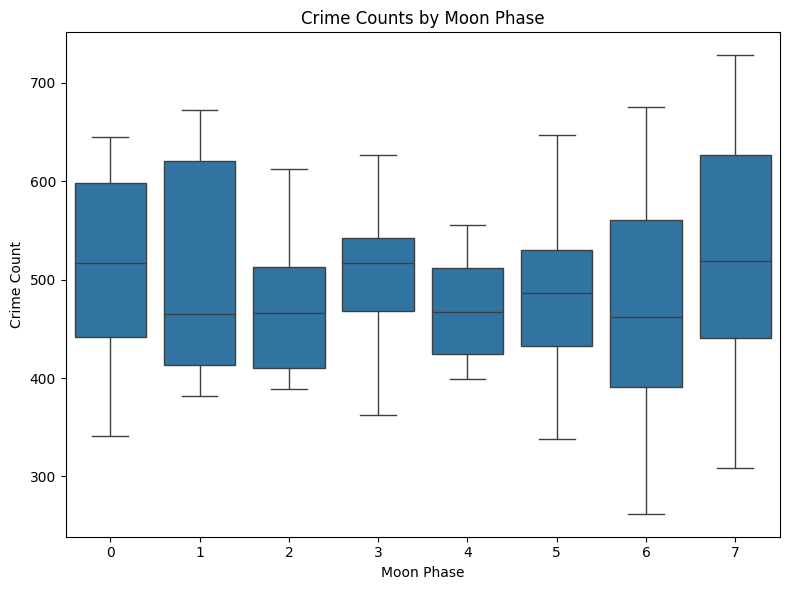

In [ ]:
# Box plot of crime counts by Moon_Phase
plt.figure(figsize=(8, 6))
sns.boxplot(x='Moon_Phase', y='Crime_Count', data=crime_counts)
plt.title('Crime Counts by Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Crime Count')
plt.tight_layout()
plt.show()

## 2.3. Relation Between Crime Counts and Sunrise/Sunset (Scatter Plot)
Scatter plots shows that occurence of crime increases when the sunset value is closer to 960 minutes and sunrise value closer 500 minutes. It might be evaluated as the crime rate at night decreases from January to March. The main reason might be the increased visibility and social activity during daylight hours.

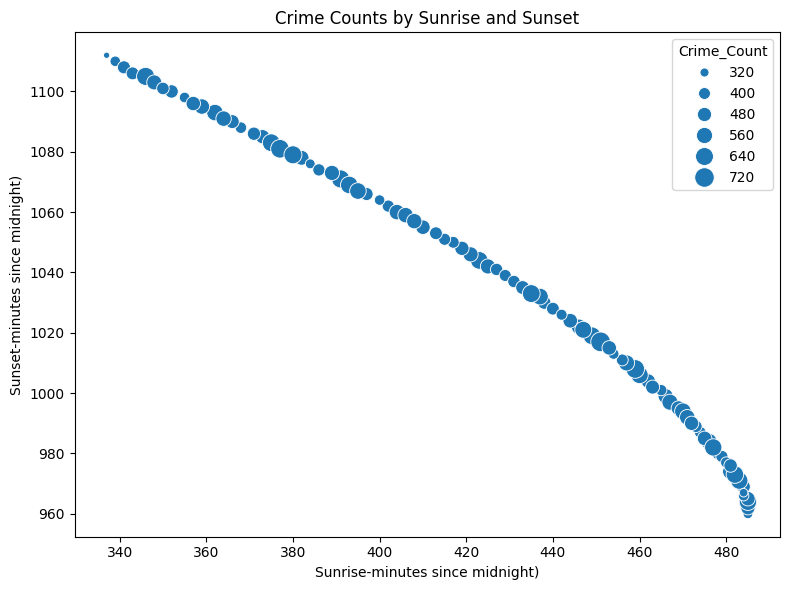

In [ ]:
# Scatter plot of crime counts against Sunrise and Sunset
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sunrise', y='Sunset', size='Crime_Count', sizes=(20, 200), data=crime_counts)
plt.title('Crime Counts by Sunrise and Sunset')
plt.xlabel('Sunrise-minutes since midnight)')
plt.ylabel('Sunset-minutes since midnight)')
plt.tight_layout()
plt.show()

## 2.4. Correlation Heatmap
This heatmap shows the correlation coefficients between different variables: sunspot number, sunrise time, sunset time, and crime count. Here, the most notable observation is the very high negative correlation (-0.99) between sunrise and sunset, which is expected, longer days mean later sunsets. Crime counts show very low correlation with these features, suggesting little direct linear relationship between these solar and lunar activities and crime occurrences.

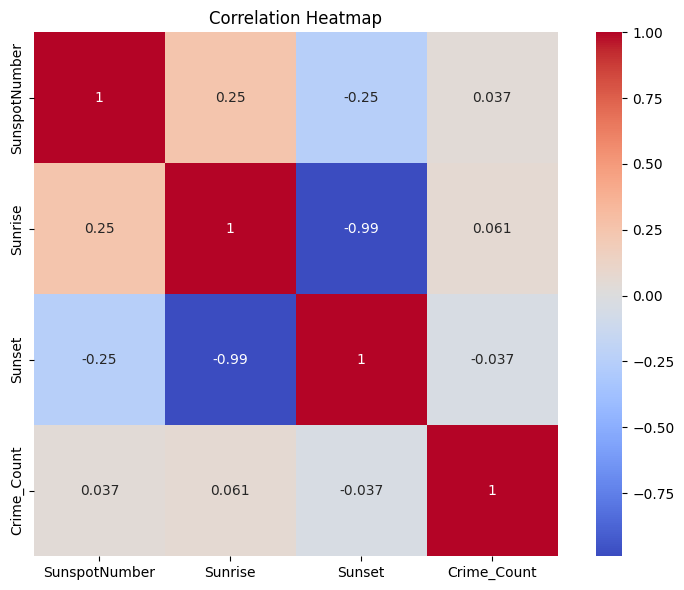

In [ ]:
# Heatmap of correlations
corr_matrix = crime_counts[['SunspotNumber', 'Sunrise', 'Sunset', 'Crime_Count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 2.5. Daily Crime Counts (Bar Plot)
After examining bar plot showing the daily crime number, a pattern showing the crime numbers has certain fall in number during Saturday-Sunday-Monday. It is visible from plot these days has less than average.

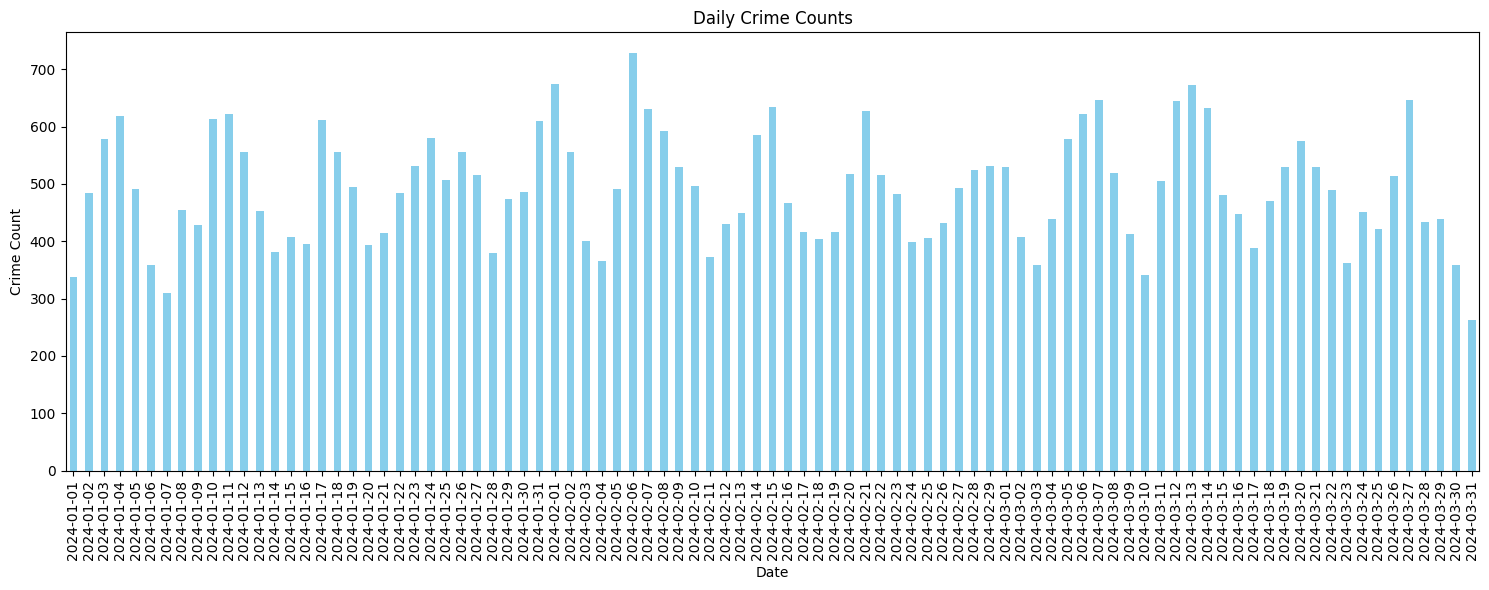

In [ ]:
# Bar plot of daily crime counts
daily_crime_counts = filtered_data.groupby(filtered_data['ARREST_DATE'].dt.date)['OFNS_DESC'].count()
plt.figure(figsize=(15, 6))
daily_crime_counts.plot(kind='bar', color='skyblue')
plt.title('Daily Crime Counts')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.tight_layout()
plt.show()

# 3. Conclusion
The results indicates that while there may be some relationship between longer daylight hours and reduced crime rates, moon phases and sunspot numbers does not have significant impact on crime. This shows that when creating a model for prediction, moon phases and sunspot numbers might have impact on the accuracy. Sunrise and sunset times more related for evaluation.